In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weatherww2/Summary of Weather.csv
/kaggle/input/weatherww2/Weather Station Locations.csv


In [42]:
#Required libraries import
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 

In [43]:
#Load Dataset

In [44]:
df = pd.read_csv("/kaggle/input/weatherww2/Summary of Weather.csv",low_memory=False)
df.shape



(119040, 31)

In [45]:
df_location = pd.read_csv("/kaggle/input/weatherww2/Weather Station Locations.csv", low_memory = False)
df_location.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [46]:
#EDA

In [47]:
df.describe()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [49]:
df.isna().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [50]:
#dropping the Columns containing high amount null values
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [51]:
columns = ['SND', 'FT', 'FB', 'FTI', 'ITH', 'DR',
       'SPD','PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE','WindGustSpd']

df.drop(columns=columns, inplace=True)


In [52]:
#kept PoorWeather as it may contain important information that help with prediction 

In [53]:
#imputing other null entries of remaining columns
#snowfall
df['Snowfall'].unique()
#replacing bad entries with null
df['Snowfall'] = df['Snowfall'].replace('#VALUE!', np.nan)
#converting obj to numeric
df['Snowfall'] = pd.to_numeric(df['Snowfall'], errors='coerce')
#fillna
df.fillna({'Snowfall': df['Snowfall'].median()}, inplace=True)
df


,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,80.0,71.0,76.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,28.333333,18.333333,23.333333,0.0,NaN,45,12,27,0,83.0,65.0,74.0,0
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,0.0,1,45,12,28,0.39,85.0,65.0,75.0,0
119037,82506,1945-12-29,0,28.333333,18.333333,23.333333,0.0,1,45,12,29,0,83.0,65.0,74.0,0
119038,82506,1945-12-30,0,28.333333,18.333333,23.333333,0.0,NaN,45,12,30,0,83.0,65.0,74.0,0


In [54]:
#PRCP
df['PRCP'].unique()
#replacing T with small value
df['PRCP'] = df['PRCP'].replace('T', 0.001)
#converting obj to numeric
df['PRCP'] = pd.to_numeric(df['PRCP'], errors='coerce')
#fillna
df.fillna({'PRCP': df['PRCP'].median()}, inplace=True)
df

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0.00,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.10,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.10,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0.00,80.0,71.0,76.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,28.333333,18.333333,23.333333,0.0,NaN,45,12,27,0.00,83.0,65.0,74.0,0
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,0.0,1,45,12,28,0.39,85.0,65.0,75.0,0
119037,82506,1945-12-29,0,28.333333,18.333333,23.333333,0.0,1,45,12,29,0.00,83.0,65.0,74.0,0
119038,82506,1945-12-30,0,28.333333,18.333333,23.333333,0.0,NaN,45,12,30,0.00,83.0,65.0,74.0,0


In [55]:
#'MAX', 'MIN', 'MEA', 
for col in ['MAX', 'MIN', 'MEA']:
    df.fillna({col: df[col].median()}, inplace=True)

In [56]:
#'SNF'
df['SNF'].unique()
#replacing T with small value
df['SNF'] = df['SNF'].replace('T', 0.001)
#converting obj to numeric
df['SNF'] = pd.to_numeric(df['SNF'], errors='coerce')
#fillna
df.fillna({'SNF': df['SNF'].median()}, inplace=True)

In [57]:
#poorweather
df['PoorWeather'].unique()
# Clean spaces
df['PoorWeather'] = df['PoorWeather'].str.replace(r'\s+', '', regex=True)
#Compute mode (excluding NaN)
mode_value = df['PoorWeather'].mode()[0]
#Fill missing with mode
df['PoorWeather'] = df['PoorWeather'].fillna(mode_value)

In [58]:
#dataset after handling null values
df.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall       0
PoorWeather    0
YR             0
MO             0
DA             0
PRCP           0
MAX            0
MIN            0
MEA            0
SNF            0
dtype: int64

In [59]:
#handling date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [60]:
#extracting useful features from date coulmn
df['DayOfWeek'] = df['Date'].dt.dayofweek    
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STA          119040 non-null  int64         
 1   Date         119040 non-null  datetime64[ns]
 2   Precip       119040 non-null  object        
 3   MaxTemp      119040 non-null  float64       
 4   MinTemp      119040 non-null  float64       
 5   MeanTemp     119040 non-null  float64       
 6   Snowfall     119040 non-null  float64       
 7   PoorWeather  119040 non-null  object        
 8   YR           119040 non-null  int64         
 9   MO           119040 non-null  int64         
 10  DA           119040 non-null  int64         
 11  PRCP         119040 non-null  float64       
 12  MAX          119040 non-null  float64       
 13  MIN          119040 non-null  float64       
 14  MEA          119040 non-null  float64       
 15  SNF          119040 non-null  floa

In [62]:
df['Precip'] = df['Precip'].replace({'T': '0', 'trace': '0', '#VALUE!': np.nan})
df['Precip'] = pd.to_numeric(df['Precip'], errors='coerce')


In [63]:
df['PoorWeather'].unique()
for i in range(4):
    df[f'PoorWeather_{i+1}'] = df['PoorWeather'].apply(
        lambda x: int(x[i]) if len(x) > i else 0
    )
df.drop(columns=['PoorWeather'], inplace=True)


In [64]:
df

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,...,MAX,MIN,MEA,SNF,DayOfWeek,WeekOfYear,PoorWeather_1,PoorWeather_2,PoorWeather_3,PoorWeather_4
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,...,78.0,72.0,75.0,0.0,2,27,1,0,0,0
1,10001,1942-07-02,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,...,84.0,71.0,78.0,0.0,3,27,1,0,0,0
2,10001,1942-07-03,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,...,79.0,72.0,76.0,0.0,4,27,1,0,0,0
3,10001,1942-07-04,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,...,80.0,72.0,76.0,0.0,5,27,1,0,0,0
4,10001,1942-07-05,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,...,80.0,71.0,76.0,0.0,6,27,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0.000,28.333333,18.333333,23.333333,0.0,45,12,27,...,83.0,65.0,74.0,0.0,3,52,1,0,0,0
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,0.0,45,12,28,...,85.0,65.0,75.0,0.0,4,52,1,0,0,0
119037,82506,1945-12-29,0.000,28.333333,18.333333,23.333333,0.0,45,12,29,...,83.0,65.0,74.0,0.0,5,52,1,0,0,0
119038,82506,1945-12-30,0.000,28.333333,18.333333,23.333333,0.0,45,12,30,...,83.0,65.0,74.0,0.0,6,52,1,0,0,0


In [65]:
# correlation check

corr = df.corr()
corr

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,...,MAX,MIN,MEA,SNF,DayOfWeek,WeekOfYear,PoorWeather_1,PoorWeather_2,PoorWeather_3,PoorWeather_4
STA,1.000000,0.119813,0.013386,0.092371,0.059319,0.078112,-0.057715,0.121408,-0.008592,0.000903,...,0.083101,0.049732,0.068696,-0.057717,0.000044,-0.008626,-0.005441,-0.026133,0.003484,0.000084
Date,0.119813,1.000000,0.018515,0.047397,-0.003617,0.023279,-0.012258,0.968056,0.107463,0.011641,...,0.020999,-0.027151,-0.003020,-0.012260,0.001618,0.100146,-0.010483,0.000784,-0.014794,0.004523
Precip,0.013386,0.018515,1.000000,0.004457,0.088455,0.047061,-0.011043,0.008951,0.037802,0.000595,...,0.004301,0.091707,0.049120,-0.011044,-0.000625,0.038323,0.025624,0.021083,0.005365,0.001567
MaxTemp,0.092371,0.047397,0.004457,1.000000,0.878384,0.969048,-0.322013,0.039585,0.031346,-0.005130,...,0.940035,0.818503,0.907613,-0.322025,-0.001142,0.028924,-0.009750,0.033441,0.008678,-0.002713
MinTemp,0.059319,-0.003617,0.088455,0.878384,1.000000,0.965425,-0.307854,-0.020733,0.069078,-0.002576,...,0.837411,0.956449,0.924603,-0.307865,-0.000131,0.066953,0.028803,0.053207,0.022412,-0.005416
MeanTemp,0.078112,0.023279,0.047061,0.969048,0.965425,1.000000,-0.323671,0.010681,0.050769,-0.004153,...,0.914111,0.910013,0.941518,-0.323683,-0.000885,0.048420,0.007809,0.044399,0.016158,-0.003903
Snowfall,-0.057715,-0.012258,-0.011043,-0.322013,-0.307854,-0.323671,1.000000,-0.001020,-0.044540,-0.000244,...,-0.340196,-0.319208,-0.340652,1.000000,0.000830,-0.043989,0.007980,-0.007346,-0.003900,-0.001235
YR,0.121408,0.968056,0.008951,0.039585,-0.020733,0.010681,-0.001020,1.000000,-0.144360,-0.011196,...,0.012535,-0.045018,-0.016550,-0.001021,0.000576,-0.146500,-0.013310,-0.004265,-0.017000,0.006171
MO,-0.008592,0.107463,0.037802,0.031346,0.069078,0.050769,-0.044540,-0.144360,1.000000,0.006563,...,0.034320,0.072372,0.054824,-0.044542,0.004348,0.974278,0.011189,0.020564,0.009388,-0.006324
DA,0.000903,0.011641,0.000595,-0.005130,-0.002576,-0.004153,-0.000244,-0.011196,0.006563,1.000000,...,-0.003187,-0.000565,-0.001921,-0.000243,-0.002717,0.067935,0.003486,-0.003585,-0.002320,-0.004082


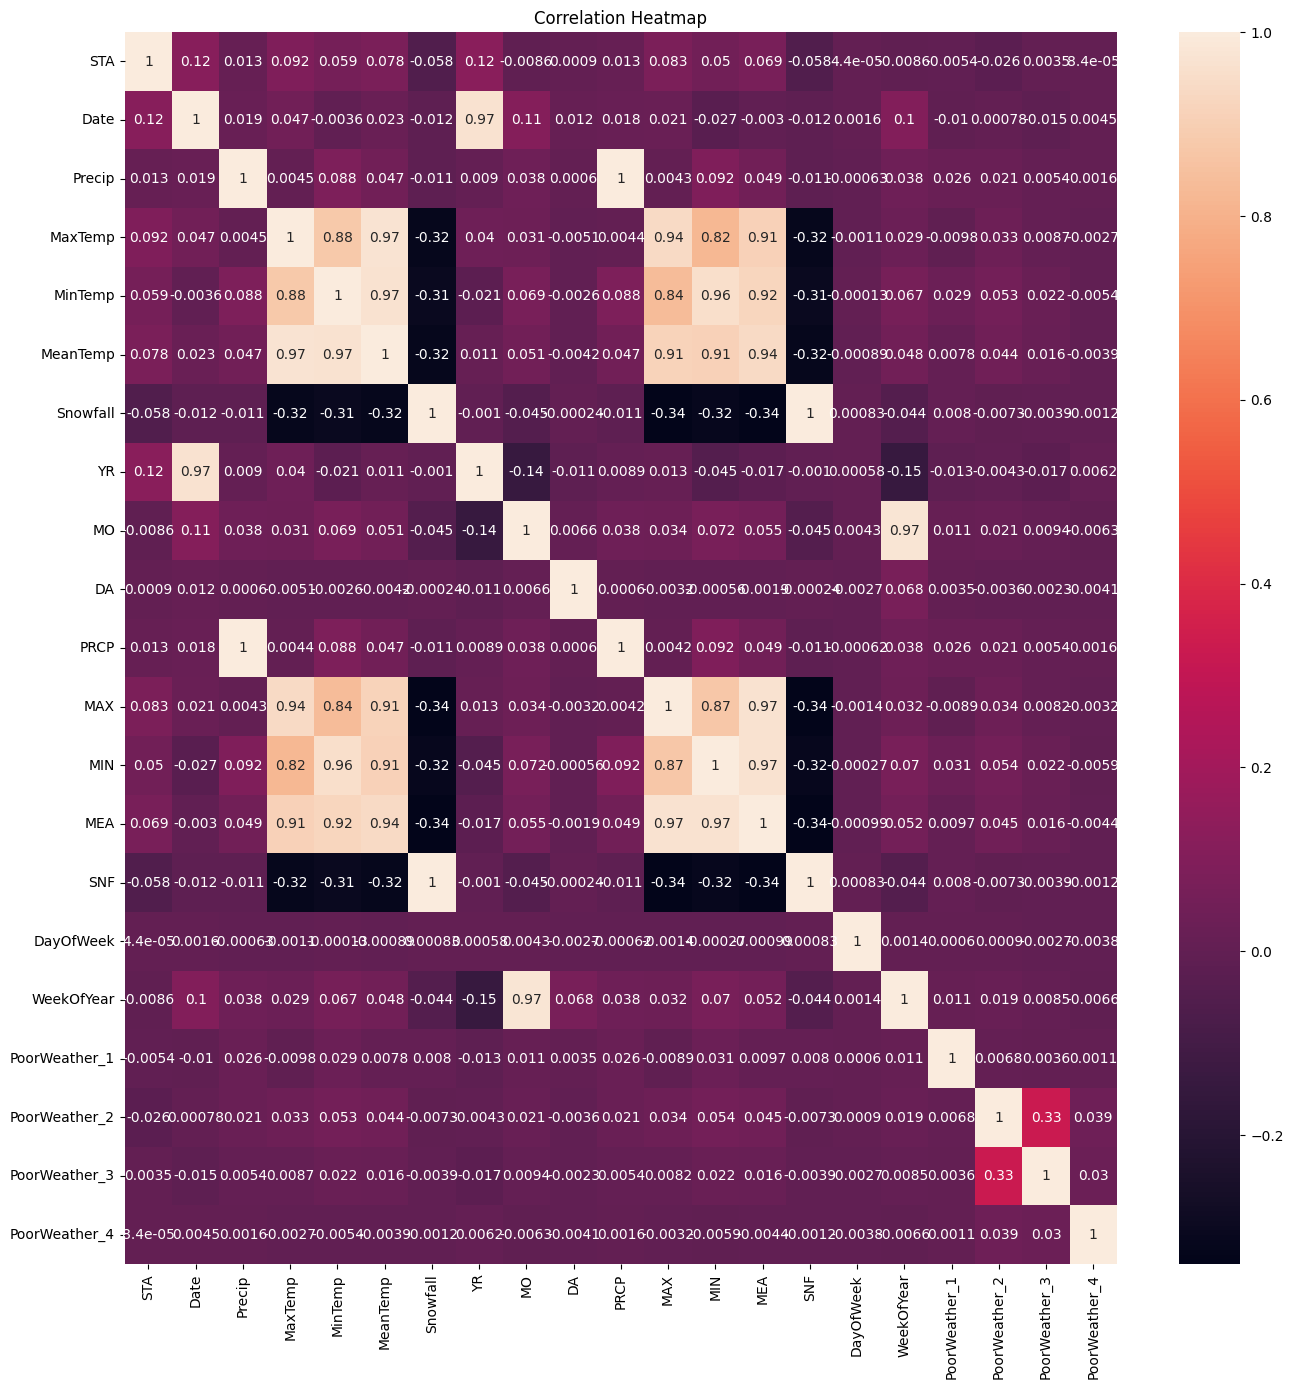

In [66]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16, 16))
sns.heatmap(corr,  annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [67]:
# dropping highly correlated feature that can be duplicate entries

df.drop(columns = ['MAX', 'SNF', 'PRCP'], inplace = True)

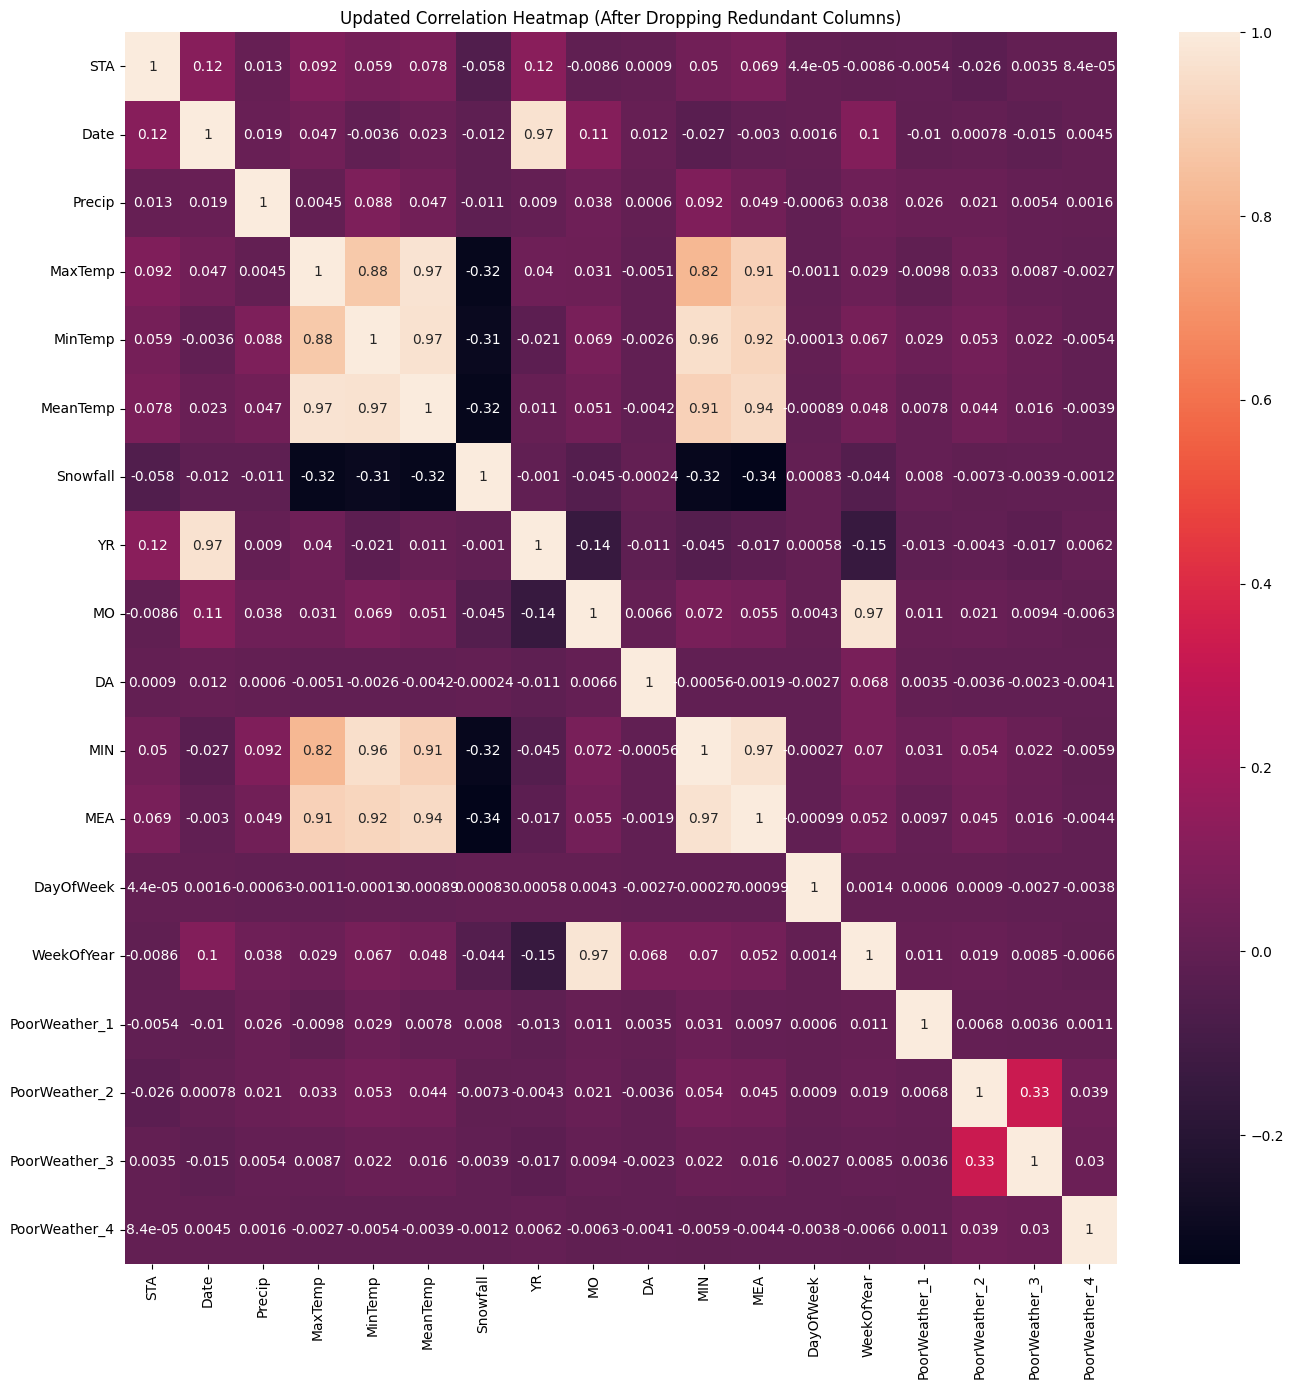

In [68]:
corr = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot = True)
plt.title("Updated Correlation Heatmap (After Dropping Redundant Columns)")
plt.show()

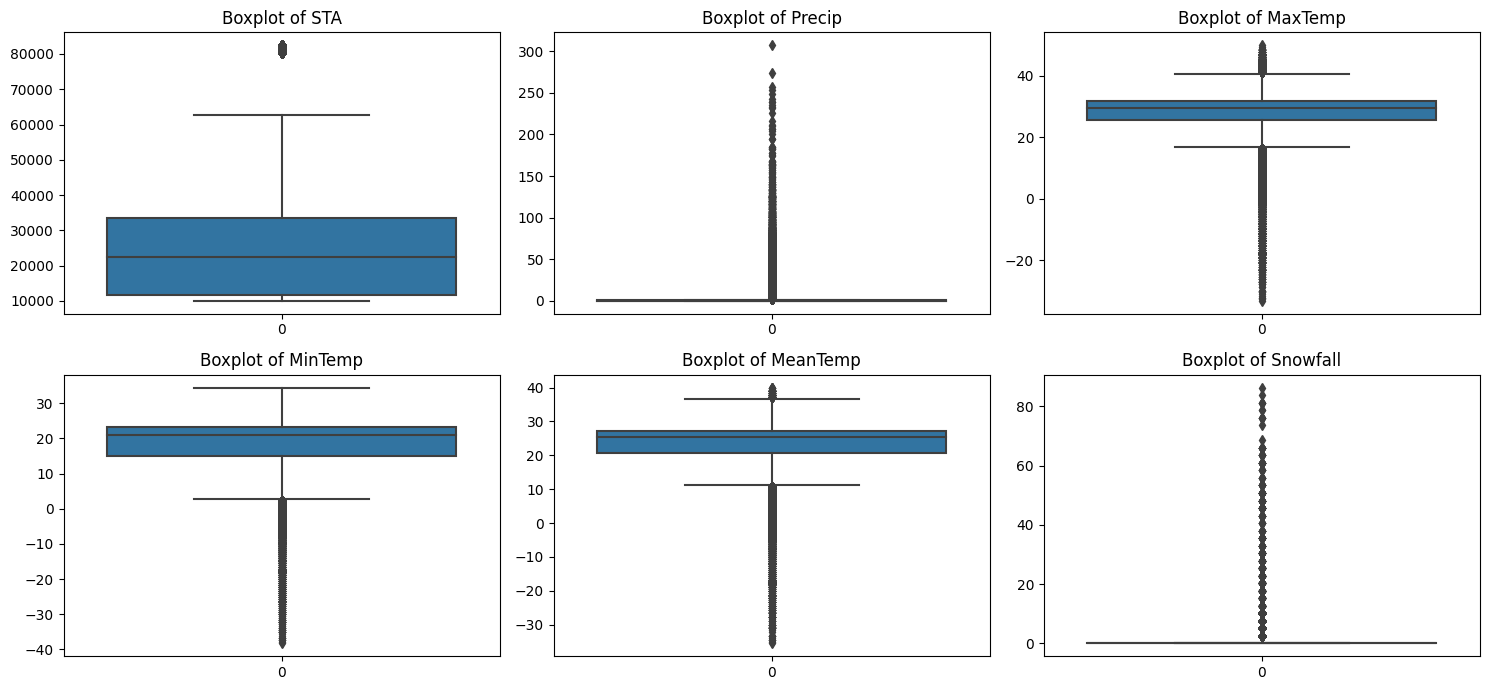

In [69]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 7))
for i, col in enumerate(numeric_cols[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [70]:
#handling outliers
import numpy as np

# Columns where extreme skew is observed
skewed_cols = ['Precip', 'Snowfall']

# Log transformation to reduce extreme spikes
for col in ['Precip', 'Snowfall']:
    # Convert to numeric safely
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Replace negative or invalid values with 0 (since no negative precipitation/snowfall)
    df.loc[df[col] < 0, col] = 0
    
    # Apply log1p transformation safely
    df[col] = np.log1p(df[col])

# IQR capping for temperature columns (if extreme negatives look unrealistic)
temp_cols = ['MaxTemp', 'MinTemp', 'MeanTemp']
for col in temp_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower, upper)


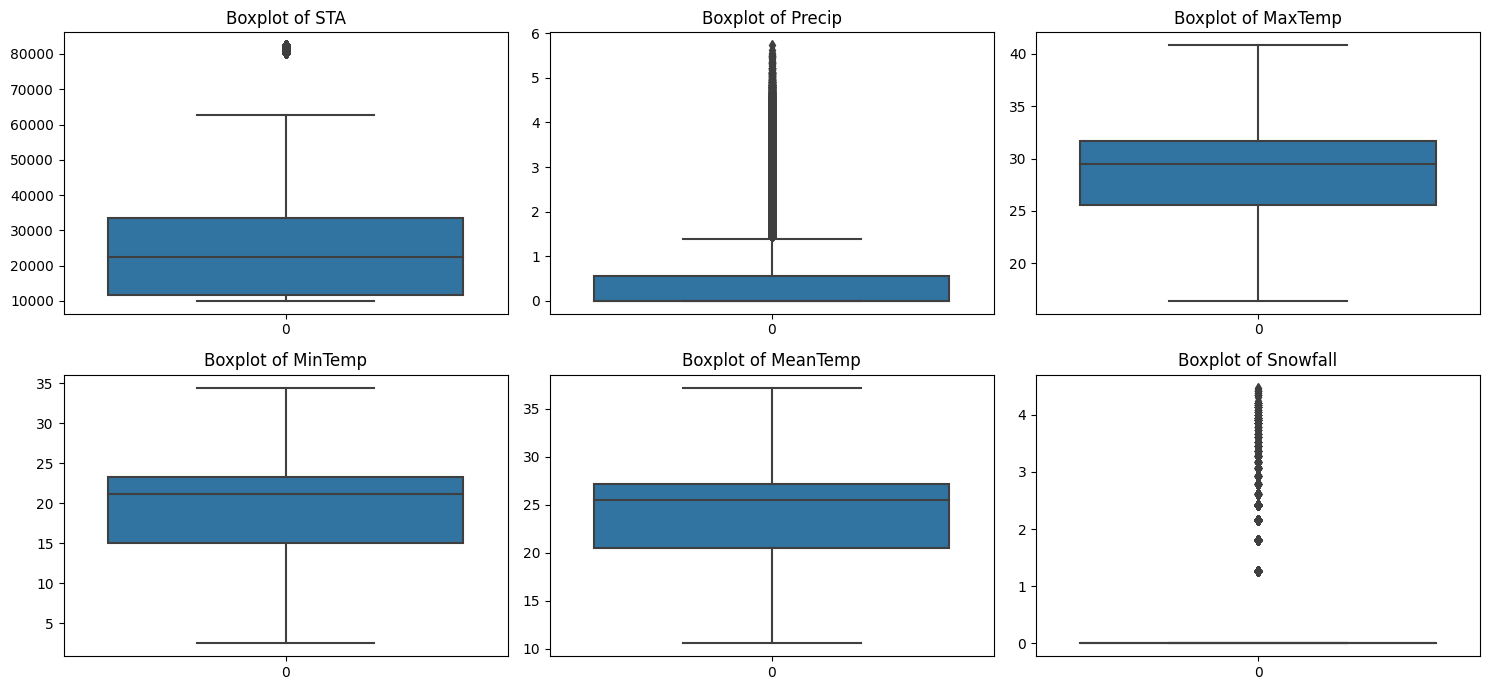

In [71]:
#after 

plt.figure(figsize=(15, 7))
for i, col in enumerate(numeric_cols[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [72]:
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,MIN,MEA,DayOfWeek,WeekOfYear,PoorWeather_1,PoorWeather_2,PoorWeather_3,PoorWeather_4
0,10001,1942-07-01,0.701115,25.555556,22.222222,23.888889,0.0,42,7,1,72.0,75.0,2,27,1,0,0,0
1,10001,1942-07-02,0.000000,28.888889,21.666667,25.555556,0.0,42,7,2,71.0,78.0,3,27,1,0,0,0
2,10001,1942-07-03,1.264127,26.111111,22.222222,24.444444,0.0,42,7,3,72.0,76.0,4,27,1,0,0,0
3,10001,1942-07-04,1.264127,26.666667,22.222222,24.444444,0.0,42,7,4,72.0,76.0,5,27,1,0,0,0
4,10001,1942-07-05,0.000000,26.666667,21.666667,24.444444,0.0,42,7,5,71.0,76.0,6,27,1,0,0,0


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['MaxTemp', 'MinTemp', 'MeanTemp']] = scaler.fit_transform(df[['MaxTemp', 'MinTemp', 'MeanTemp']])

In [81]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['MaxTemp','Date'])   
y = df['MaxTemp']                

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       
    random_state=42,    
    shuffle=True        
)


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize model
lin_reg = LinearRegression()

# Train on training data
lin_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lin = lin_reg.predict(X_test)


In [85]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Results:")
print("MSE:", mse_lin)
print("RMSE:", np.sqrt(mse_lin))
print("R² Score:", r2_lin)


Linear Regression Results:
MSE: 0.014097485462062527
RMSE: 0.11873283228350331
R² Score: 0.9858655935959668


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0))
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)

print("Poly R²:", r2_score(y_test, y_pred_poly))
